In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [2]:
df_init=pd.read_csv('initial.csv')
df_init.drop(columns=['Unnamed: 0'],inplace=True)
df_init['DATE']=pd.to_datetime(df_init['DATE'])
df_init.head()

,CAMIS,DATE,SCORE,INSPECTION TYPE,02A,02B,02C,02D,02E,02F,...,10D,10E,10F,10G,10H,10I,10J,ACTION,CRITICAL FLAG,GRADE
0,30075445,2017-05-18,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A
1,30075445,2018-05-11,5.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,0,A
2,30075445,2019-05-16,14.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,B
3,30112340,2016-10-03,48.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,3,C
4,30112340,2017-06-26,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A


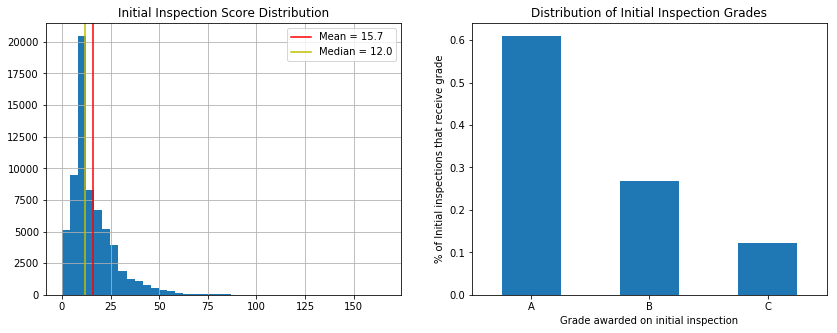

In [3]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
df_init['SCORE'].hist(bins=40)
plt.axvline(x=df_init['SCORE'].mean(),color='r',label=f'Mean = {round(df_init["SCORE"].mean(),1)}')
plt.axvline(x=df_init['SCORE'].median(),color='y',label=f'Median = {df_init["SCORE"].median()}')
plt.legend()
plt.title('Initial Inspection Score Distribution')

plt.subplot(1,2,2)
df_init['GRADE'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('% of Initial inspections that receive grade')
plt.xlabel('Grade awarded on initial inspection')
plt.title('Distribution of Initial Inspection Grades')
plt.show()

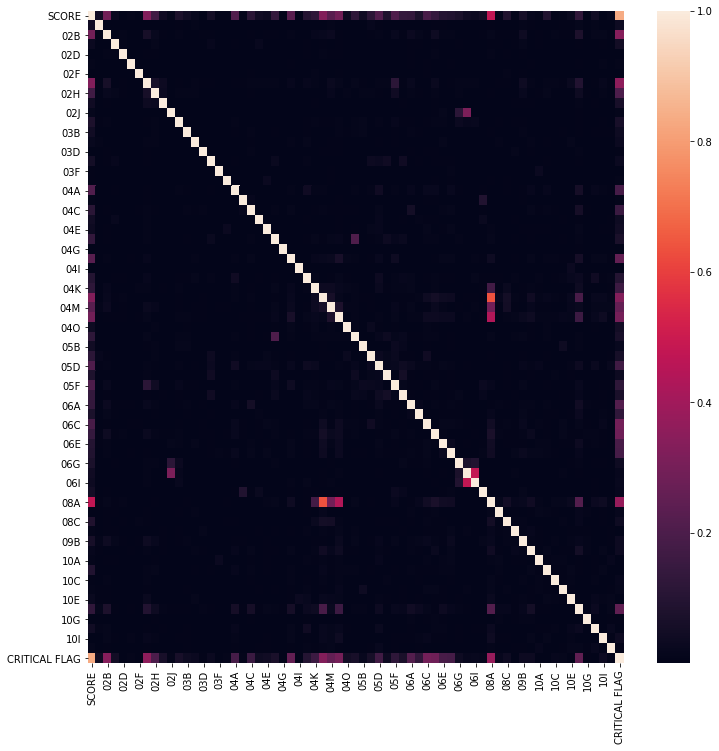

In [4]:
plt.figure(figsize=(12,12))
sns.heatmap(abs(df_init.drop(columns=['CAMIS','ACTION','GRADE']).corr()))

In [5]:
sum(abs(df_init.corr()['SCORE'])>0.3)

5

In [6]:
abs(df_init.corr()['SCORE']).sort_values(ascending=False).head()

SCORE            1.000000
CRITICAL FLAG    0.833407
08A              0.475213
04L              0.330653
02G              0.324326
Name: SCORE, dtype: float64

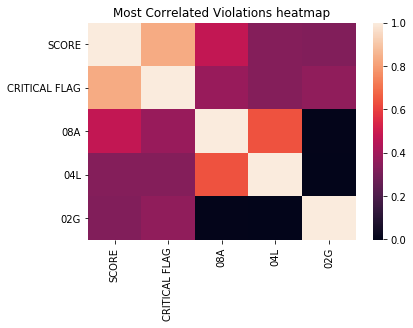

In [7]:
cols=abs(df_init.corr()['SCORE']).sort_values(ascending=False).head(5).index
sns.heatmap(df_init[cols].corr())
plt.title('Most Correlated Violations heatmap')
plt.show()

The number of critical flag violations correlates the most highly with a high score, this is to be expected as these are more serious violations and likely attract more points

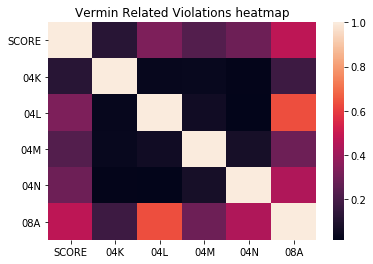

In [8]:
vermin=['SCORE','04K','04L','04M','04N','08A']
sns.heatmap(df_init[vermin].corr())
plt.yticks(rotation=0)
plt.title('Vermin Related Violations heatmap')
plt.show()

In [9]:
round(df_init[vermin].corr(),2)

,SCORE,04K,04L,04M,04N,08A
SCORE,1.00,0.12,0.33,0.23,0.29,0.48
04K,0.12,1.00,0.03,0.03,0.02,0.17
04L,0.33,0.03,1.00,0.06,0.02,0.64
04M,0.23,0.03,0.06,1.00,0.07,0.29
04N,0.29,0.02,0.02,0.07,1.00,0.44
08A,0.48,0.17,0.64,0.29,0.44,1.00


Although violation 08A correlates the most highly with score, it itself is a non-critical flag violation

In [10]:
vio_corr=df_init.drop(columns=['CAMIS','ACTION','GRADE','SCORE','CRITICAL FLAG']).corr()
for col in vio_corr.columns:
    
    for v in vio_corr[col].values:
        if 0.5<v<1:
            print(col)
            print(v)

04L
0.6371803809496962
08A
0.6371803809496962


Violations 04L and 08A are evidence of mice and lack of rodent proofing, it is expected that they would co-occur 

Beside 04L and 08A, no other 2 violations correlate with each other beyond 50%

In [11]:
df_init['CRITICAL FLAG'].describe()

count    65932.000000
mean         1.726112
std          1.246251
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         13.000000
Name: CRITICAL FLAG, dtype: float64

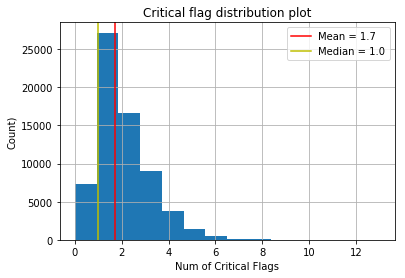

In [12]:
df_init['CRITICAL FLAG'].hist(bins=14)
plt.title('Critical flag distribution plot')
plt.axvline(x=df_init['CRITICAL FLAG'].mean(),color='r',label=f'Mean = {round(df_init["CRITICAL FLAG"].mean(),1)}')
plt.axvline(x=df_init['CRITICAL FLAG'].median(),color='y',label=f'Median = {df_init["CRITICAL FLAG"].median()}')
plt.xlabel('Num of Critical Flags')
plt.ylabel('Count)')
plt.legend()
plt.show()

In [13]:
scores_crity=df_init.loc[df_init['CRITICAL FLAG']>=1]['SCORE']
scores_critn=df_init.loc[df_init['CRITICAL FLAG']==0]['SCORE']

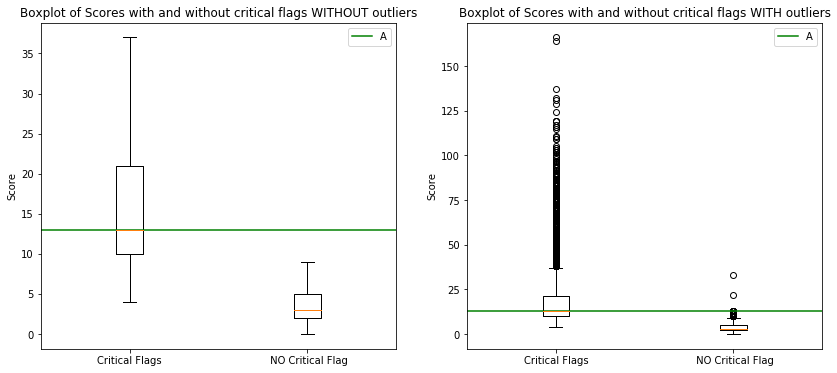

In [14]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.boxplot([scores_crity,scores_critn],showfliers=False)
plt.xticks([1,2],['Critical Flags',' NO Critical Flag'])
plt.axhline(13,color='green', label='A')
plt.title('Boxplot of Scores with and without critical flags WITHOUT outliers')
plt.legend()
plt.ylabel('Score')

plt.subplot(1,2,2)
plt.boxplot([scores_crity,scores_critn])
plt.title('Boxplot of Scores with and without critical flags WITH outliers')
plt.xticks([1,2],['Critical Flags',' NO Critical Flag'])
plt.axhline(13,color='green', label='A')
plt.ylabel('Score')
plt.legend()
plt.show()

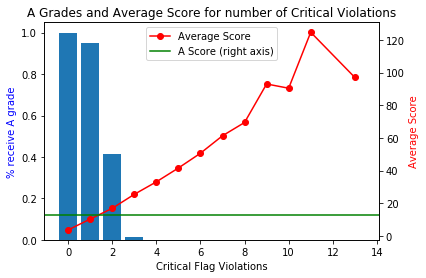

In [44]:
df_init['A']=df_init['GRADE']=='A'

fig, ax1 = plt.subplots()


ax1.set_xlabel('Critical Flag Violations')
ax1.set_ylabel('% receive A grade', color='blue')
ax1.bar(df_init.groupby('CRITICAL FLAG')['A'].mean().index,df_init.groupby('CRITICAL FLAG')['A'].mean().values,label='A Grade %')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average Score', color='red')  # we already handled the x-label with ax1
ax2.plot(df_init.groupby('CRITICAL FLAG')['SCORE'].mean(),color='red', label='Average Score', marker='o')
# ax2.tick_params(axis='y', labelcolor=color)
plt.axhline(13,color='green', label='A Score (right axis)')
plt.legend(loc='upper center')
plt.title('A Grades and Average Score for number of Critical Violations')
plt.show()

In [15]:
sum(scores_critn<=13)/len(scores_critn)

0.9997266265718973

99.97% of all inspections that do not result in a critical flag violation are awarded an A grade

In [16]:
sum(df_init.loc[df_init['CRITICAL FLAG']==1]['GRADE']=='A')/len(df_init.loc[df_init['CRITICAL FLAG']==1])

0.9519531681455028

95% of all inspections that result in 1 critical flag violation are still able to obtain an A grade

In [17]:
sum(df_init.loc[df_init['CRITICAL FLAG']==2]['GRADE']=='A')/len(df_init.loc[df_init['CRITICAL FLAG']==2])

0.41602113733261276

41% of inspection that result in 2 critical flag violations manage to obtain an A grade

In [18]:
sum(df_init.loc[df_init['CRITICAL FLAG']>2]['GRADE']=='A')/len(df_init.loc[df_init['CRITICAL FLAG']>2])

0.007836778813673827

Less than 1% of inspections that result in more than 2 critical flags obtain an A grade